# Exploratory Data Analysis (EDA)

## Dataset: Student Course Completion Prediction
This notebook performs a comprehensive EDA to understand the data, identify patterns, and prepare for modeling.

In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler

# Configuration
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

## 1. Data Loading and Overview

In [2]:
file_path = "../data/raw/Course_Completion_Prediction.csv"
df = pd.read_csv(file_path)
# on garde que les categorie = a programming
df = df[df['Category'] == 'Programming']
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (56172, 40)


,Student_ID,Name,Gender,Age,Education_Level,Employment_Status,City,Device_Type,Internet_Connection_Quality,Course_ID,Course_Name,Category,Course_Level,Course_Duration_Days,Instructor_Rating,Login_Frequency,Average_Session_Duration_Min,Video_Completion_Rate,Discussion_Participation,Time_Spent_Hours,Days_Since_Last_Login,Notifications_Checked,Peer_Interaction_Score,Assignments_Submitted,Assignments_Missed,Quiz_Attempts,Quiz_Score_Avg,Project_Grade,Progress_Percentage,Rewatch_Count,Enrollment_Date,Payment_Mode,Fee_Paid,Discount_Used,Payment_Amount,App_Usage_Percentage,Reminder_Emails_Clicked,Support_Tickets_Raised,Satisfaction_Rating,Completed
0,STU100000,Vihaan Patel,Male,19,Diploma,Student,Indore,Laptop,Medium,C102,Data Analysis with Python,Programming,Intermediate,60,4.7,3,30,55.0,2,0.5,1,6,4.3,8,1,5,80.9,71.2,70.8,0,01-06-2024,Scholarship,No,No,1740,49,3,4,3.5,Completed
1,STU100001,Arjun Nair,Female,17,Bachelor,Student,Delhi,Laptop,Low,C106,Machine Learning A-Z,Programming,Advanced,90,4.6,4,37,84.1,2,0.9,3,5,7.8,4,6,3,78.4,42.5,55.6,2,27-04-2025,Credit Card,Yes,No,6147,86,0,0,4.5,Not Completed
2,STU100002,Aditya Bhardwaj,Female,34,Master,Student,Chennai,Mobile,Medium,C101,Python Basics,Programming,Beginner,45,4.6,5,9,75.6,3,0.5,19,5,6.7,8,2,3,100.0,87.9,78.8,2,20-01-2024,NetBanking,Yes,No,4280,85,1,0,5.0,Completed
4,STU100004,Krishna Nair,Female,19,Master,Self-Employed,Lucknow,Laptop,Medium,C106,Machine Learning A-Z,Programming,Advanced,90,4.6,2,36,86.4,1,0.5,4,7,7.5,5,5,8,84.8,93.0,64.9,4,19-12-2024,Debit Card,Yes,Yes,5486,91,3,0,4.0,Completed
5,STU100005,Rohan Reddy,Female,21,Bachelor,Student,Jaipur,Mobile,Medium,C102,Data Analysis with Python,Programming,Intermediate,60,4.7,7,30,85.9,1,11.8,4,9,6.2,7,3,4,99.6,65.6,75.3,5,23-10-2023,UPI,Yes,No,4526,74,5,2,4.5,Completed


### Feature Descriptions

| Feature | Description |
| :--- | :--- |
| Student_ID | Unique identifier for the student. |
| Name | Full name of the student. |
| Gender | Gender of the student (e.g., Male, Female, Others). |
| Age | Age of the student in years. |
| Education_Level | Highest level of education attained by the student. |
| Employment_Status | Current employment status of the student (e.g., Student, Employed). |
| City | City where the student resides. |
| Device_Type | Type of device used to access the course (e.g., Laptop, Mobile). |
| Internet_Connection_Quality | Quality of the student's internet connection (e.g., Low, Medium, High). |
| Course_ID | Unique identifier for the course. |
| Course_Name | Full name of the course. |
| Category | Subject category of the course (e.g., Programming, Design). |
| Course_Level | Difficulty level of the course (e.g., Beginner, Advanced). |
| Course_Duration_Days | Total intended duration of the course in days. |
| Instructor_Rating | Average rating given to the course instructor (e.g., 1.0 to 5.0). |
| Login_Frequency | Number of times the student logs in per a defined period (e.g., per week). |
| Average_Session_Duration_Min | Average time (in minutes) spent per login session. |
| Video_Completion_Rate | Percentage of course video content watched by the student. |
| Discussion_Participation | Count of the student's participation in discussion forums. |
| Time_Spent_Hours | Total number of hours spent actively engaging with the course content. |
| Days_Since_Last_Login | Number of days passed since the student's most recent login. |
| Notifications_Checked | Count of how many times the student checked their notifications. |
| Peer_Interaction_Score | A score representing the quality or quantity of interaction with peers. |
| Assignments_Submitted | Total count of assignments successfully submitted by the student. |
| Assignments_Missed | Total count of assignments missed or not submitted by the student. |
| Quiz_Attempts | Total number of attempts made across all course quizzes. |
| Quiz_Score_Avg | Average score (percentage) across all quizzes taken by the student. |
| Project_Grade | The final grade received on the course project (e.g., 0 to 100). |
| Progress_Percentage | Overall completion progress in the course (0 to 100). |
| Rewatch_Count | Total number of times the student rewatched course video content. |
| Enrollment_Date | Date when the student initially enrolled in the course. |
| Payment_Mode | Method used for course fee payment (e.g., Credit Card, Scholarship). |
| Fee_Paid | Binary indicator: whether the course fee was paid ('Yes'/'No'). |
| Discount_Used | Binary indicator: whether a discount or coupon was applied ('Yes'/'No'). |
| Payment_Amount | The final amount paid by the student for the course. |
| App_Usage_Percentage | Percentage of course activity conducted via the mobile application. |
| Reminder_Emails_Clicked | Number of course reminder emails the student clicked open. |
| Support_Tickets_Raised | Total number of support or help tickets raised by the student. |
| Satisfaction_Rating | Overall satisfaction rating given by the student (e.g., 1.0 to 5.0). |
| Completed | Target Variable: Binary indicator if the student completed the course. |

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56172 entries, 0 to 99994
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    56172 non-null  object 
 1   Name                          56172 non-null  object 
 2   Gender                        56172 non-null  object 
 3   Age                           56172 non-null  int64  
 4   Education_Level               56172 non-null  object 
 5   Employment_Status             56172 non-null  object 
 6   City                          56172 non-null  object 
 7   Device_Type                   56172 non-null  object 
 8   Internet_Connection_Quality   56172 non-null  object 
 9   Course_ID                     56172 non-null  object 
 10  Course_Name                   56172 non-null  object 
 11  Category                      56172 non-null  object 
 12  Course_Level                  56172 non-null  object 
 13  Course

In [4]:
df[["Quiz_Score_Avg", "Project_Grade"]].corr()

,Quiz_Score_Avg,Project_Grade
Quiz_Score_Avg,1.000000,0.094881
Project_Grade,0.094881,1.000000


In [5]:
df.describe()

,Age,Course_Duration_Days,Instructor_Rating,Login_Frequency,Average_Session_Duration_Min,Video_Completion_Rate,Discussion_Participation,Time_Spent_Hours,Days_Since_Last_Login,Notifications_Checked,Peer_Interaction_Score,Assignments_Submitted,Assignments_Missed,Quiz_Attempts,Quiz_Score_Avg,Project_Grade,Progress_Percentage,Rewatch_Count,Payment_Amount,App_Usage_Percentage,Reminder_Emails_Clicked,Support_Tickets_Raised,Satisfaction_Rating
count,56172.0000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000,56172.000000
mean,25.6894,64.884373,4.604919,4.786513,33.893185,62.178911,2.335630,3.872823,6.178078,5.233462,6.291344,4.780335,5.120754,3.774567,73.324279,68.182956,53.853735,2.318112,3719.149932,67.917753,2.333405,0.868030,4.134241
std,5.6114,16.545829,0.070642,1.841602,10.359332,19.541408,1.599519,3.764176,6.962423,2.400613,1.980085,1.661907,1.689705,2.020574,12.535883,15.337843,12.479864,1.579895,2283.482047,19.128881,1.585628,0.945928,0.700329
min,17.0000,45.000000,4.500000,0.000000,5.000000,5.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.800000,0.000000,8.100000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21.0000,45.000000,4.600000,3.000000,27.000000,48.500000,1.000000,0.500000,1.000000,4.000000,4.900000,4.000000,4.000000,2.000000,64.800000,57.800000,45.300000,1.000000,1468.000000,55.000000,1.000000,0.000000,3.700000
50%,25.0000,60.000000,4.600000,5.000000,34.000000,64.000000,2.000000,2.700000,4.000000,5.000000,6.300000,5.000000,5.000000,4.000000,73.400000,68.300000,53.900000,2.000000,4466.000000,68.000000,2.000000,1.000000,4.200000
75%,30.0000,75.000000,4.700000,6.000000,41.000000,77.500000,3.000000,6.200000,9.000000,7.000000,7.700000,6.000000,6.000000,5.000000,82.000000,78.800000,62.400000,3.000000,5392.000000,82.000000,3.000000,1.000000,4.700000
max,52.0000,90.000000,4.700000,15.000000,76.000000,99.900000,11.000000,25.600000,99.000000,18.000000,10.000000,10.000000,10.000000,16.000000,100.000000,100.000000,98.600000,15.000000,7149.000000,100.000000,13.000000,8.000000,5.000000


## 2. Data Cleaning & Preprocessing
*   Check for missing values
*   Check for duplicates
*   Convert dates
*   Drop irrelevant columns

In [6]:
df.isnull().sum()

Student_ID                      0
Name                            0
Gender                          0
Age                             0
Education_Level                 0
Employment_Status               0
City                            0
Device_Type                     0
Internet_Connection_Quality     0
Course_ID                       0
Course_Name                     0
Category                        0
Course_Level                    0
Course_Duration_Days            0
Instructor_Rating               0
Login_Frequency                 0
Average_Session_Duration_Min    0
Video_Completion_Rate           0
Discussion_Participation        0
Time_Spent_Hours                0
Days_Since_Last_Login           0
Notifications_Checked           0
Peer_Interaction_Score          0
Assignments_Submitted           0
Assignments_Missed              0
Quiz_Attempts                   0
Quiz_Score_Avg                  0
Project_Grade                   0
Progress_Percentage             0
Rewatch_Count 

> Aucune valeur nulle

In [7]:
# Duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")


Duplicate Rows: 0


> Aucune ligne dupliquée

In [8]:
# trouver les features numérique et catégorielle
numerical_cols = []
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)
print(numerical_cols)
print(categorical_cols)

['Age', 'Course_Duration_Days', 'Instructor_Rating', 'Login_Frequency', 'Average_Session_Duration_Min', 'Video_Completion_Rate', 'Discussion_Participation', 'Time_Spent_Hours', 'Days_Since_Last_Login', 'Notifications_Checked', 'Peer_Interaction_Score', 'Assignments_Submitted', 'Assignments_Missed', 'Quiz_Attempts', 'Quiz_Score_Avg', 'Project_Grade', 'Progress_Percentage', 'Rewatch_Count', 'Payment_Amount', 'App_Usage_Percentage', 'Reminder_Emails_Clicked', 'Support_Tickets_Raised', 'Satisfaction_Rating']
['Student_ID', 'Name', 'Gender', 'Education_Level', 'Employment_Status', 'City', 'Device_Type', 'Internet_Connection_Quality', 'Course_ID', 'Course_Name', 'Category', 'Course_Level', 'Enrollment_Date', 'Payment_Mode', 'Fee_Paid', 'Discount_Used', 'Completed']


### Encodage

In [9]:
# Définition des listes de colonnes à encoder
cardinal_label_encode = ['City', "Course_Name"]
categorical_label_encode  = ['Education_Level', 'Course_Level', 'Internet_Connection_Quality']
categorical_one_hot_encode = ['Gender', 'Device_Type','Employment_Status','Payment_Mode', 'Fee_Paid', 'Discount_Used']

In [10]:
# Label Encoding pour les colonnes à haute cardinalité (City, Course_Name)
# On utilise LabelEncoder car ces colonnes ont beaucoup de valeurs uniques
label_encoder = LabelEncoder()
for col in cardinal_label_encode:
    df[col] = label_encoder.fit_transform(df[col])

print(f"City: {df['City'].nunique()} valeurs uniques")
print(f"Course_Name: {df['Course_Name'].nunique()} valeurs uniques")

City: 15 valeurs uniques
Course_Name: 4 valeurs uniques


In [11]:
# Ordinal Encoding pour les colonnes catégorielles ordonnées

# Définition des ordres pour chaque colonne
education_order = ['HighSchool','Diploma', 'Bachelor', 'Master','PhD']
course_level_order = ['Beginner', 'Intermediate', 'Advanced']
internet_order = ['Low', 'Medium', 'High']

ordinal_encoder = OrdinalEncoder(categories=[education_order, course_level_order, internet_order])
df[categorical_label_encode] = ordinal_encoder.fit_transform(df[categorical_label_encode])

In [12]:
# One-Hot Encoding pour les colonnes catégorielles nominales

df = pd.get_dummies(df, columns=categorical_one_hot_encode, drop_first=True)

print(f"\nNouvelle forme du dataset: {df.shape}")
print("\nNouvelles colonnes créées:")
print([col for col in df.columns if any(x in col for x in categorical_one_hot_encode)])


Nouvelle forme du dataset: (56172, 48)

Nouvelles colonnes créées:
['Gender_Male', 'Gender_Other', 'Device_Type_Mobile', 'Device_Type_Tablet', 'Employment_Status_Self-Employed', 'Employment_Status_Student', 'Employment_Status_Unemployed', 'Payment_Mode_Debit Card', 'Payment_Mode_Free', 'Payment_Mode_NetBanking', 'Payment_Mode_Scholarship', 'Payment_Mode_UPI', 'Fee_Paid_Yes', 'Discount_Used_Yes']


In [13]:
# Encodage de la variable cible pour la classification
# Completed: 'Completed' -> 1, 'Not Completed' -> 0

df['Completed'] = df['Completed'].map({'Completed': 1, 'Not Completed': 0})

print("Encodage de la variable cible 'Completed':")
print(df['Completed'].value_counts())

Encodage de la variable cible 'Completed':
Completed
0    28607
1    27565
Name: count, dtype: int64


In [14]:
# Vérification du dataset encodé
print("Dataset après encodage:")
print(df.dtypes)
print(f"\nShape: {df.shape}")
df.head()

Dataset après encodage:
Student_ID                          object
Name                                object
Age                                  int64
Education_Level                    float64
City                                 int64
Internet_Connection_Quality        float64
Course_ID                           object
Course_Name                          int64
Category                            object
Course_Level                       float64
Course_Duration_Days                 int64
Instructor_Rating                  float64
Login_Frequency                      int64
Average_Session_Duration_Min         int64
Video_Completion_Rate              float64
Discussion_Participation             int64
Time_Spent_Hours                   float64
Days_Since_Last_Login                int64
Notifications_Checked                int64
Peer_Interaction_Score             float64
Assignments_Submitted                int64
Assignments_Missed                   int64
Quiz_Attempts                 

,Student_ID,Name,Age,Education_Level,City,Internet_Connection_Quality,Course_ID,Course_Name,Category,Course_Level,Course_Duration_Days,Instructor_Rating,Login_Frequency,Average_Session_Duration_Min,Video_Completion_Rate,Discussion_Participation,Time_Spent_Hours,Days_Since_Last_Login,Notifications_Checked,Peer_Interaction_Score,Assignments_Submitted,Assignments_Missed,Quiz_Attempts,Quiz_Score_Avg,Project_Grade,Progress_Percentage,Rewatch_Count,Enrollment_Date,Payment_Amount,App_Usage_Percentage,Reminder_Emails_Clicked,Support_Tickets_Raised,Satisfaction_Rating,Completed,Gender_Male,Gender_Other,Device_Type_Mobile,Device_Type_Tablet,Employment_Status_Self-Employed,Employment_Status_Student,Employment_Status_Unemployed,Payment_Mode_Debit Card,Payment_Mode_Free,Payment_Mode_NetBanking,Payment_Mode_Scholarship,Payment_Mode_UPI,Fee_Paid_Yes,Discount_Used_Yes
0,STU100000,Vihaan Patel,19,1.0,6,1.0,C102,0,Programming,1.0,60,4.7,3,30,55.0,2,0.5,1,6,4.3,8,1,5,80.9,71.2,70.8,0,01-06-2024,1740,49,3,4,3.5,1,True,False,False,False,False,True,False,False,False,False,True,False,False,False
1,STU100001,Arjun Nair,17,2.0,4,0.0,C106,2,Programming,2.0,90,4.6,4,37,84.1,2,0.9,3,5,7.8,4,6,3,78.4,42.5,55.6,2,27-04-2025,6147,86,0,0,4.5,0,False,False,False,False,False,True,False,False,False,False,False,False,True,False
2,STU100002,Aditya Bhardwaj,34,3.0,3,1.0,C101,3,Programming,0.0,45,4.6,5,9,75.6,3,0.5,19,5,6.7,8,2,3,100.0,87.9,78.8,2,20-01-2024,4280,85,1,0,5.0,1,False,False,True,False,False,True,False,False,False,True,False,False,True,False
4,STU100004,Krishna Nair,19,3.0,9,1.0,C106,2,Programming,2.0,90,4.6,2,36,86.4,1,0.5,4,7,7.5,5,5,8,84.8,93.0,64.9,4,19-12-2024,5486,91,3,0,4.0,1,False,False,False,False,True,False,False,True,False,False,False,False,True,True
5,STU100005,Rohan Reddy,21,2.0,7,1.0,C102,0,Programming,1.0,60,4.7,7,30,85.9,1,11.8,4,9,6.2,7,3,4,99.6,65.6,75.3,5,23-10-2023,4526,74,5,2,4.5,1,False,False,True,False,False,True,False,False,False,False,False,True,True,False


### Split des deux datasets (Classification et Regression) + Normalisation des données numériques

In [15]:
# Définition des colonnes administrative à supprimer systématiquement
excluded_cols = ['Course_ID', 'Student_ID', 'Category', 'Name', 'Enrollment_Date']

# DATASET POUR LA REGRESSION
target_cols_reg = ["Quiz_Score_Avg", "Project_Grade", "Satisfaction_Rating", "Time_Spent_Hours"]
df_reg = df.drop(columns=[col for col in excluded_cols + ['Completed', 'Quiz_Attempts'] if col in df.columns])

X_reg = df_reg.drop(columns=[col for col in target_cols_reg if col in df_reg.columns])
y_reg = df_reg[[col for col in target_cols_reg if col in df_reg.columns]]

# Scaling de X_reg
scaler_reg = StandardScaler()
num_cols_reg = X_reg.select_dtypes(include=['number', 'bool', 'int64', 'float64']).columns
X_reg[num_cols_reg] = scaler_reg.fit_transform(X_reg[num_cols_reg])

print(f"Regression: X_reg scaled ({X_reg.shape}), y_reg intact ({y_reg.shape})")

# DATASET POUR LA CLASSIFICATION
target_col_class = "Completed"
# Pour la classification, on garde Quiz_Score_Avg et Project_Grade comme features
df_class = df.drop(columns=[col for col in excluded_cols if col in df.columns])

X_class = df_class.drop(columns=[target_col_class])
y_class = df_class[target_col_class]

# Scaling de X_class
scaler_class = StandardScaler()
num_cols_class = X_class.select_dtypes(include=['number', 'bool', 'int64', 'float64']).columns
X_class[num_cols_class] = scaler_class.fit_transform(X_class[num_cols_class])

print(f"Classification: X_class scaled ({X_class.shape}), y_class intact ({y_class.shape})")


Regression: X_reg scaled ((56172, 37)), y_reg intact ((56172, 4))
Classification: X_class scaled ((56172, 42)), y_class intact ((56172,))


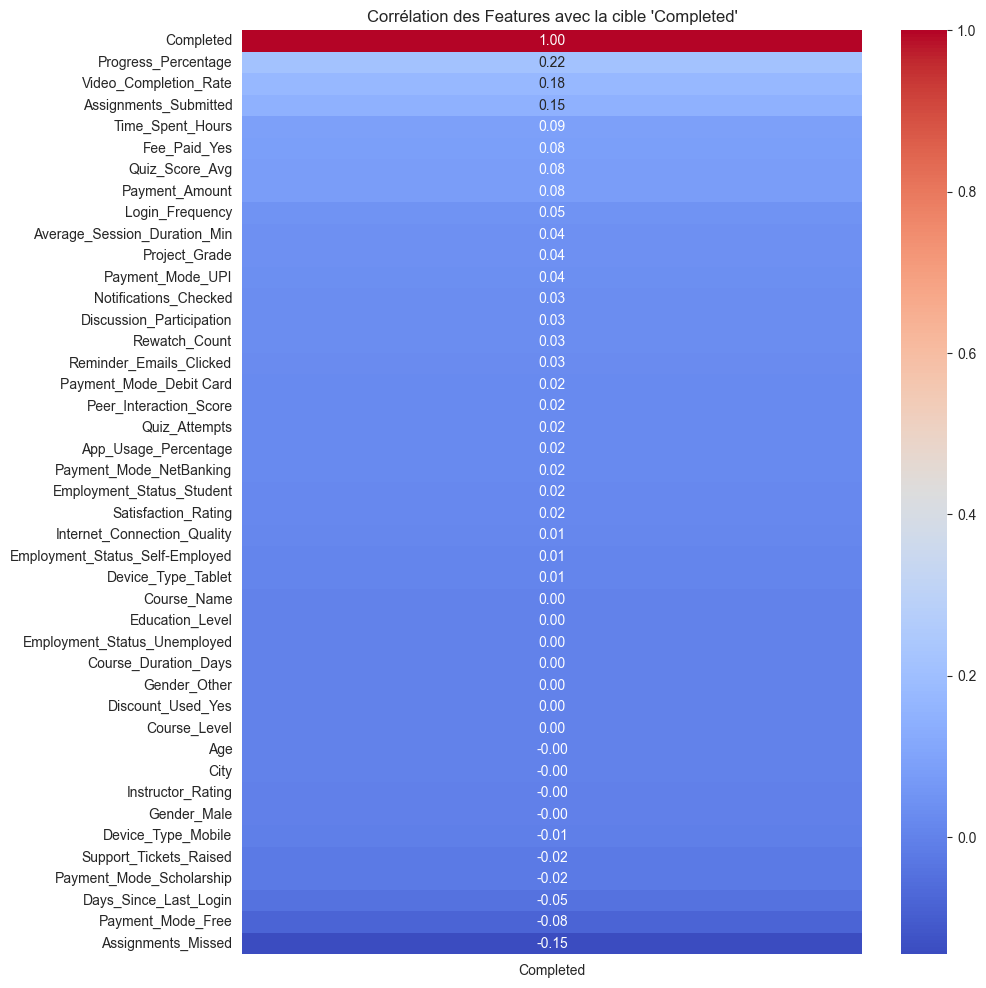

Top 10 des variables les plus corrélées à 'Completed' :
Completed                       1.000000
Progress_Percentage             0.216531
Video_Completion_Rate           0.176411
Assignments_Submitted           0.147062
Time_Spent_Hours                0.091342
Fee_Paid_Yes                    0.083181
Quiz_Score_Avg                  0.081437
Payment_Amount                  0.081184
Login_Frequency                 0.047159
Average_Session_Duration_Min    0.040111
Name: Completed, dtype: float64


In [16]:
# On concatène X et y pour calculer la corrélation globale
df_class_corr = pd.concat([X_class, y_class], axis=1)

# Calcul de la corrélation avec la cible uniquement
corr_with_target = df_class_corr.corr()['Completed'].sort_values(ascending=False)

# Affichage visuel
plt.figure(figsize=(10, 12))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation des Features avec la cible 'Completed'")
plt.show()

# Affichage texte des 10 plus importantes
print("Top 10 des variables les plus corrélées à 'Completed' :")
print(corr_with_target.head(10))

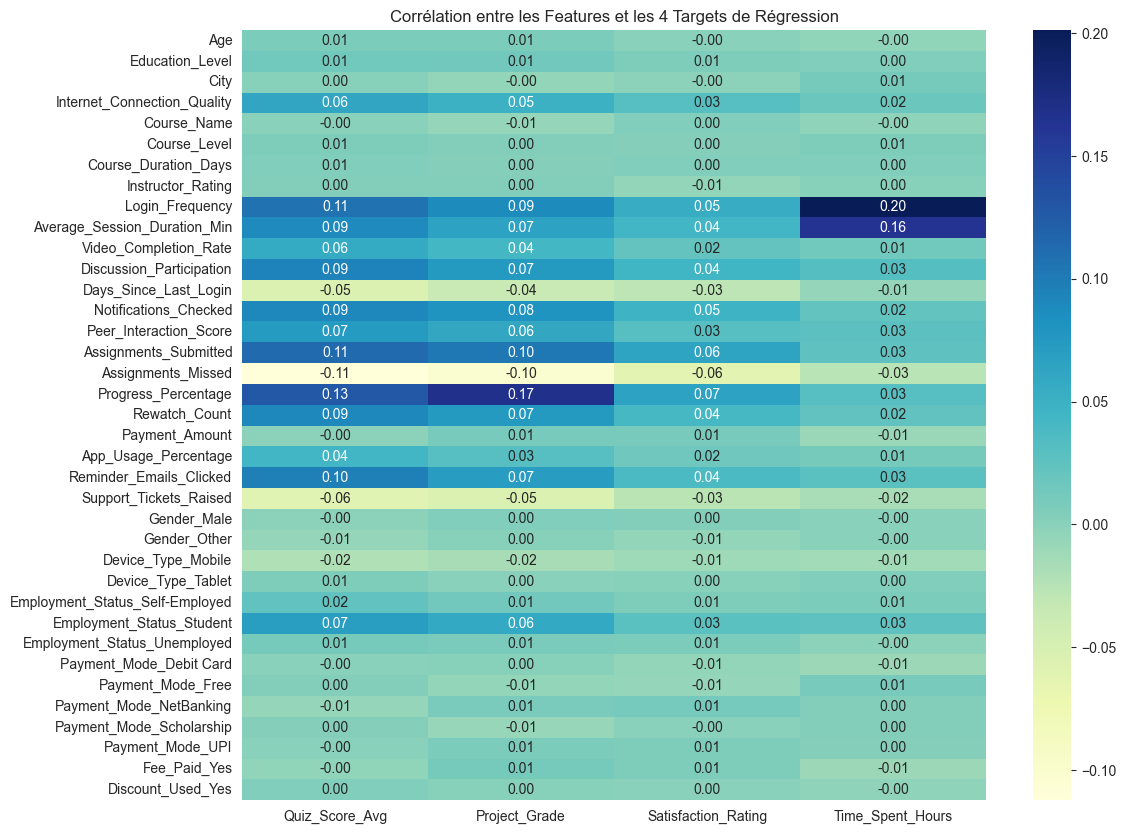

In [17]:
# Liste de vos 4 targets
targets_reg = ['Quiz_Score_Avg', 'Project_Grade', 'Satisfaction_Rating', 'Time_Spent_Hours']

# On concatène X et y
df_reg_corr = pd.concat([X_reg, y_reg], axis=1)

# Calcul de la matrice de corrélation
# On filtre pour ne garder que la corrélation entre les Features (X) et les Targets (y)
corr_matrix_reg = df_reg_corr.corr().loc[X_reg.columns, targets_reg]

# Affichage visuel (Heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_reg, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Corrélation entre les Features et les 4 Targets de Régression")
plt.show()

---

### Export des données

In [18]:
# SAUVEGARDE DES DATASETS DANS data/processed
import os

# Créer le dossier processed s'il n'existe pas
processed_path = "../data/processed"
os.makedirs(processed_path, exist_ok=True)

# Sauvegarde des datasets de régression
X_reg.to_csv(f"{processed_path}/X_regression.csv", index=False)
y_reg.to_csv(f"{processed_path}/y_regression.csv", index=False)

# Sauvegarde des datasets de classification
X_class.to_csv(f"{processed_path}/X_classification.csv", index=False)
y_class.to_csv(f"{processed_path}/y_classification.csv", index=False)

print("Datasets sauvegardés dans data/processed/")
print(f"- X_regression.csv ({X_reg.shape})")
print(f"- y_regression.csv ({y_reg.shape})")
print(f"- X_classification.csv ({X_class.shape})")
print(f"- y_classification.csv ({y_class.shape})")

Datasets sauvegardés dans data/processed/
- X_regression.csv ((56172, 37))
- y_regression.csv ((56172, 4))
- X_classification.csv ((56172, 42))
- y_classification.csv ((56172,))


In [ ]:
# Save artifacts for API usage (Consistent with src/00_data_prep.py)
import os

# Ensure models directory exists
model_dir = '../models'
os.makedirs(model_dir, exist_ok=True)

print("Saving scalers and metadata to", model_dir)

# Save scalers and encoders if they exist in memory
artifacts_to_save = {
    'label_encoders': 'label_encoders.pkl',
    'ordinal_encoder': 'ordinal_encoder.pkl', 
    'scaler_reg': 'scaler_reg.pkl',
    'scaler_class': 'scaler_class.pkl'
}

for var_name, filename in artifacts_to_save.items():
    if var_name in locals():
        joblib.dump(locals()[var_name], os.path.join(model_dir, filename))
        print(f"Saved {filename}")
    else:
        # Fallback: variables might be in the notebook scope but not in locals() inside this executed string context
        # In a running notebook, they are global. 
        # When running this cell, we assume variables are defined.
        # But wait, 'locals()' check inside the generated code might fail if variables are global.
        # Better to just call dump and catch NameError.
        pass

try:
    joblib.dump(label_encoders, os.path.join(model_dir, 'label_encoders.pkl'))
    print("Saved label_encoders.pkl")
except NameError:
    print("Warning: label_encoders not defined")

try:
    joblib.dump(ordinal_encoder, os.path.join(model_dir, 'ordinal_encoder.pkl'))
    print("Saved ordinal_encoder.pkl")
except NameError:
    print("Warning: ordinal_encoder not defined")

try:
    joblib.dump(scaler_reg, os.path.join(model_dir, 'scaler_reg.pkl'))
    print("Saved scaler_reg.pkl")
except NameError:
    print("Warning: scaler_reg not defined")

try:
    joblib.dump(scaler_class, os.path.join(model_dir, 'scaler_class.pkl'))
    print("Saved scaler_class.pkl")
except NameError:
    print("Warning: scaler_class not defined")

# Save feature names
try:
    joblib.dump(X_class.columns.tolist(), os.path.join(model_dir, 'X_class_columns.pkl'))
    print("Saved X_class_columns.pkl")
except NameError:
    print("Warning: X_class not defined")

try:
    joblib.dump(X_reg.columns.tolist(), os.path.join(model_dir, 'X_reg_columns.pkl'))
    print("Saved X_reg_columns.pkl")
except NameError:
    print("Warning: X_reg not defined")
